<a href="https://colab.research.google.com/github/bmamba08/Play-Store-App-review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [167]:
# Importing libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Play store dataset, User reviews dataset.

In [169]:
#using pandas library and 'read_csv' function to read App_data file and User_review file
df_app_data = pd.read_csv('/content/Play Store Data.csv')
df_user_review = pd.read_csv('/content/User Reviews.csv')

## Introduction to Data

In [170]:
df_app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [171]:
df_user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Understanding Dataset's

In [172]:
# Checking the info of App_data file
df_app_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [173]:
# Checking the info of the User_review file
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Exploring,Wrangling and Cleaning Data

In [174]:
df_app_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df_app_data.shape

(10841, 13)

In [176]:
df_app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [177]:
df_app_data[df_app_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [178]:
df_app_data.loc[10472] = df_app_data.loc[10472].shift()
df_app_data['App'].loc[10472] = df_app_data['Category'].loc[10472]
df_app_data['Category'].loc[10472] = np.nan
df_app_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [179]:
df_app_data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

Data type of Rating is object. If we convert from string to numeric, we can make our analysis easy.

In [180]:
df_app_data['Rating'] = pd.to_numeric(df_app_data['Rating'])
df_app_data['Rating'].dtype

dtype('float64')

Similarly, we can change other columns data-types according to the values it contains.

In [181]:
df_app_data['Reviews'] =df_app_data['Reviews'].astype(float)
df_app_data['Reviews'].dtype


dtype('float64')

In [182]:
df_app_data['Installs'] = df_app_data.Installs.str.replace(",","")
df_app_data['Installs'] = df_app_data.Installs.str.replace("+","")
df_app_data['Installs'] = df_app_data['Installs'].astype(float)
df_app_data['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [183]:
df_app_data['Size'] = df_app_data.Size.replace("Varies with device",np.nan)

In [184]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
df_app_data.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [185]:
df_app_data.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


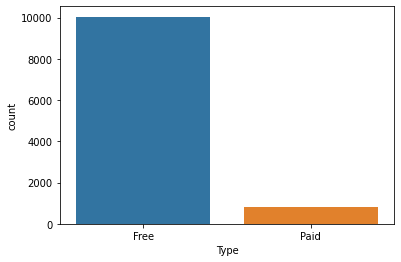

In [186]:
sns.countplot(df_app_data.Type)

In [187]:
df_app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## Visualizing Data

Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results.

1. Unique number of Categories in the Playstore apps dataset.

In [188]:
# Exploring and analyzing different number of Categories in Apps Data.
diff_category = df_app_data.Category.value_counts().reset_index().rename(columns={'index':'Category','Category':'Counts'})
diff_category

,Category,Counts
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


2. Top 5 Categories with respect to the number of app counts.

In [189]:
# Here we can see the top 5 Categories using (.head) method.
top_five_categories = diff_category.head()  
top_five_categories

,Category,Counts
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460


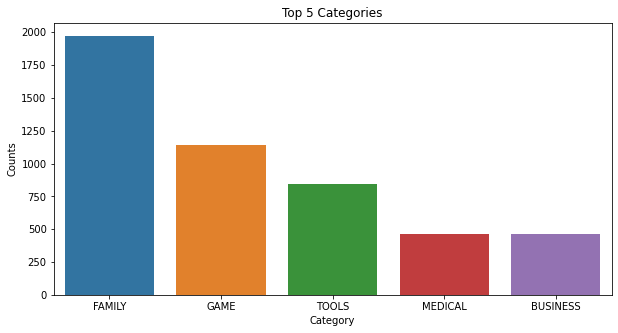

In [190]:
plt.figure(figsize=(10,5))
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Top 5 Categories")
sns.barplot(data=top_five_categories, x= 'Category', y='Counts')


3. Number of installed applications for top 20-Categories.

In [191]:
category_installs = df_app_data.groupby(['Category'])['Installs'].sum()
top_category_installs = pd.merge(diff_category, category_installs, on='Category')
top_20_category_installs = top_category_installs.head(20)
top_20_category_installs

,Category,Counts,Installs
0,FAMILY,1972,1.025826e+10
1,GAME,1144,3.508602e+10
2,TOOLS,843,1.145277e+10
3,MEDICAL,463,5.325744e+07
4,BUSINESS,460,1.001915e+09
5,PRODUCTIVITY,424,1.417609e+10
6,PERSONALIZATION,392,2.325495e+09
7,COMMUNICATION,387,3.264728e+10
8,SPORTS,384,1.751174e+09
9,LIFESTYLE,382,5.376435e+08


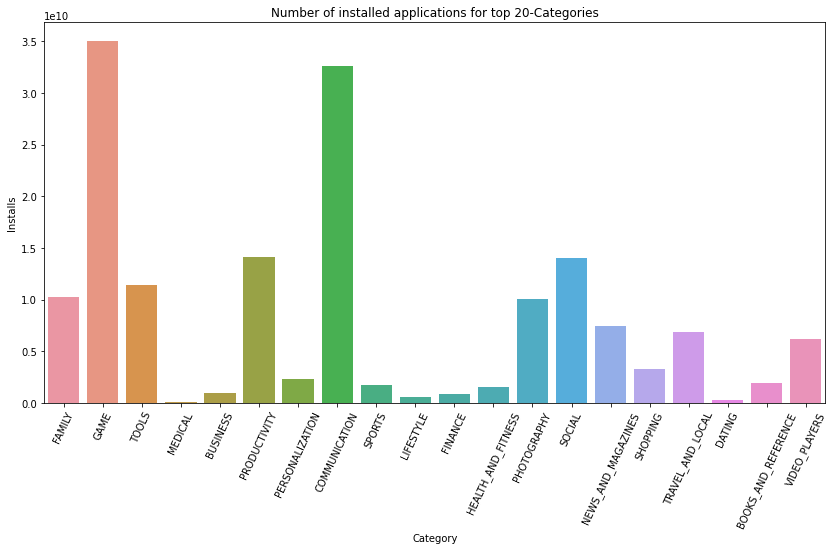

In [192]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for top 20-Categories")
sns.barplot(data=top_20_category_installs,x='Category',y='Installs')
plt.show()

4. Number of applications installed for top 20 Genres.

In [193]:
top_genres = df_app_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = df_app_data.groupby(['Genres'])['Installs'].sum()


In [194]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

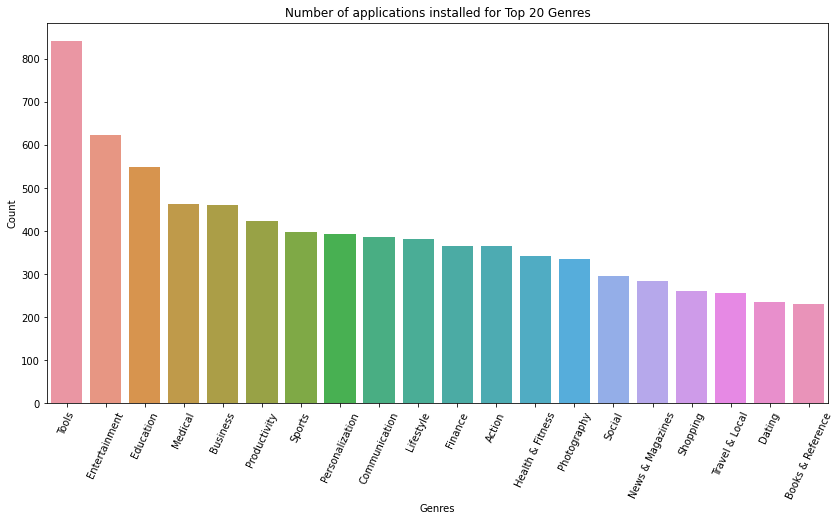

In [195]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Number of applications installed for Top 20 Genres")
sns.barplot(data=top_20_genres_installs,x='Genres',y='Count')
plt.show()